# Clustering images with unsupervised learning

### Adrian P. Bustamante, Ph.D.
##### adrianpebus@gmail.com

#### Table of contents

[1. Objective](*objective)

[2. About the dataset](*dataset)

[3. Data Preprocessing](*preprocessing)

[4. Unsupervised models](*models)

[5. Summary of the results](*summary)

[6. Conclusion](*conclusion)

## 1. Objective <a class="anchor" id="objective"></a>

We consider a dataset consisting of images of shoes, sandals, and boots. The objective of this small project is to apply a couple of unsupervised clustering models, together with dimensionality reduction of the dataset, to classify the images. 

Due to the simplicity of the approach, it is not expected that the models reach high accuracy, precision and/or recall. To analyze the outcomes of the models considered, the data has been labeled in the preprocessing part of the notebook. However only unsupervised models have been used in this work.

## 2. About the dataset <a class="anchor" id="dataset"></a>

This Shoe vs Sandal vs Boot Image Dataset contains 15,000 images of shoes, sandals and boots. 5000 images for each category. The images have a resolution of 136x102 pixels in RGB color model.
There are three classes here. Shoe, Sandal, Boot

This dataset is a modified version of a large image dataset provided by M.Stephenson.

The data can be found at the following link: https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")

print("Path to dataset files:", path)

Path to dataset files: /home/adrian/.cache/kagglehub/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images/versions/2


## 3. Data preprocessing <a class="anchor" id="preprocessing"></a>

Due to lack of RAM memory we only use a sample of the data and we reduce the number of pixels on the images.

In [2]:
from os.path import join, isfile
from os import listdir

path_boots = join(path, "Shoe vs Sandal vs Boot Dataset/Boot")
path_sandals = join(path, "Shoe vs Sandal vs Boot Dataset/Sandal")
path_shoes = join(path, 'Shoe vs Sandal vs Boot Dataset/Shoe')

files_boots = [join(path_boots,f) for f in listdir(path_boots) if isfile(join(path_boots, f)) and f[0] != ',']
files_sandals = [join(path_sandals,f) for f in listdir(path_sandals) if isfile(join(path_sandals, f)) and f[0] != ',']
files_shoes = [join(path_shoes,f) for f in listdir(path_shoes) if isfile(join(path_shoes, f)) and f[0] != ',']

In [59]:
from PIL import Image, ImageOps
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
plt.style.use('dark_background')

In [4]:
#def get_data_matrix(f_boots, f_sandals, f_shoes, Height = 102, Width = 136, n_images =1500):
###opening the images, resizing them and changing to grayscales
def get_data_matrix(f_boots, f_sandals, f_shoes, Height = 80, Width = 90, n_images = 3000):
    X_boots = np.zeros( (n_images, Height*Width) )
    X_sandals = np.zeros( (n_images, Height*Width) )
    X_shoes = np.zeros( (n_images, Height*Width) )
    for i, file in enumerate(f_boots):
        if i == n_images:
            break
        img = Image.open(file).resize((Width, Height))
        img_gray = np.array(ImageOps.grayscale(img))
        X_boots[i] = img_gray.reshape(1,-1)
    for i, file in enumerate(f_sandals):
        if i == n_images:
            break
        img = Image.open(file).resize((Width, Height))
        img_gray = np.array(ImageOps.grayscale(img))
        X_sandals[i] = img_gray.reshape(1,-1)
    for i, file in enumerate(f_shoes):
        if i == n_images:
            break
        img = Image.open(file).resize((Width, Height))
        img_gray = np.array(ImageOps.grayscale(img))
        X_shoes[i] = img_gray.reshape(1,-1)
    return X_boots, X_sandals, X_shoes

#def plot_fig_gray(x, Height =102, Width=136):
def plot_fig_gray(x, Height = 80, Width= 90):
    plt.imshow(x.reshape((Height, Width)),cmap="gray")
    plt.axis('off')
    #plt.show()



In [5]:
X_boots, X_sandals, X_shoes = get_data_matrix(files_boots, files_sandals, files_shoes)
X_boots.shape, X_sandals.shape, X_shoes.shape

((3000, 7200), (3000, 7200), (3000, 7200))

(np.float64(-0.5), np.float64(89.5), np.float64(79.5), np.float64(-0.5))

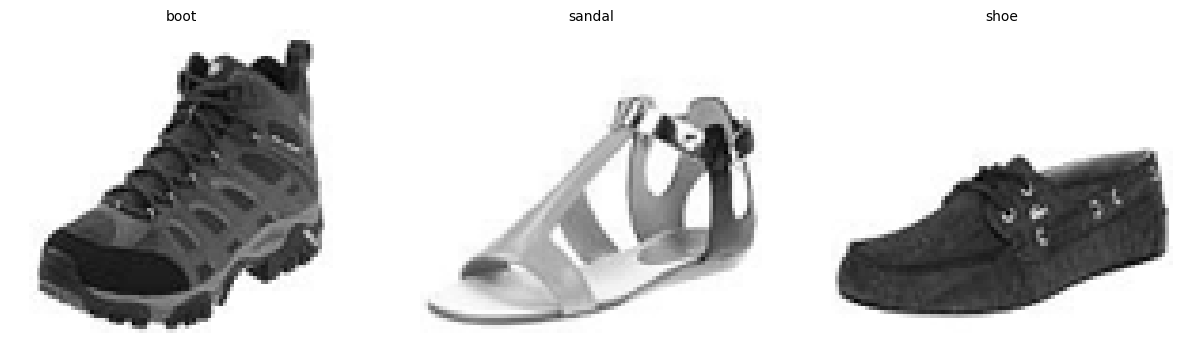

In [58]:
####ploting some sample figures
#plt.imshow( np.uint8(X_boots[0]).reshape((102, 136,3)))
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plot_fig_gray(X_boots[random.randint(0,500)])
plt.title("boot" ,fontsize=10)
plt.subplot(1, 3, 2)
plot_fig_gray(X_sandals[random.randint(0,500)])
plt.title("sandal" ,fontsize=10)
plt.subplot(1, 3, 3)
plot_fig_gray(X_shoes[random.randint(0,500)])
plt.title("shoe" ,fontsize=10)
plt.axis('off')
     
#plt.tight_layout()


##### Labeling the data

In [7]:
##labeling the data
X_b = pd.DataFrame(X_boots)
X_b['class'] = 'boots'
X_sa = pd.DataFrame(X_sandals)
X_sa['class'] = 'sandals'
X_sh = pd.DataFrame(X_shoes)
X_sh['class'] = 'shoes'

In [8]:
data = pd.concat([X_b, X_sa, X_sh], axis=0).reset_index(drop=True)
data = data.sample(frac=1, random_state=1).reset_index(drop=True) ##shuffles the data
data
y = data['class'] #labels
data.drop('class', axis=1, inplace=True)
y

(       0      1      2      3      4      5      6      7      8      9     \
 0     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 1     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 2     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 3     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 4     255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 ...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 8995  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 8996  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 8997  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 8998  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 8999  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
 
       ...   7190   7191   7192   7193   7194   71

#### Splitting into train and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, test_size=0.2, random_state=1)

In [10]:
X_train.shape, X_test.shape

((7200, 7200), (1800, 7200))

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199
7915,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
7116,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
7423,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
7194,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4292,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
8092,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
7079,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


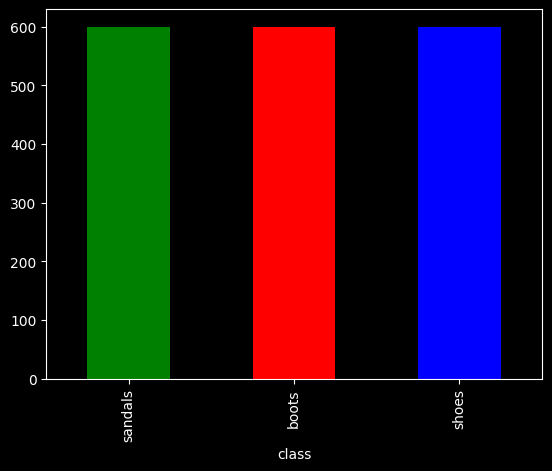

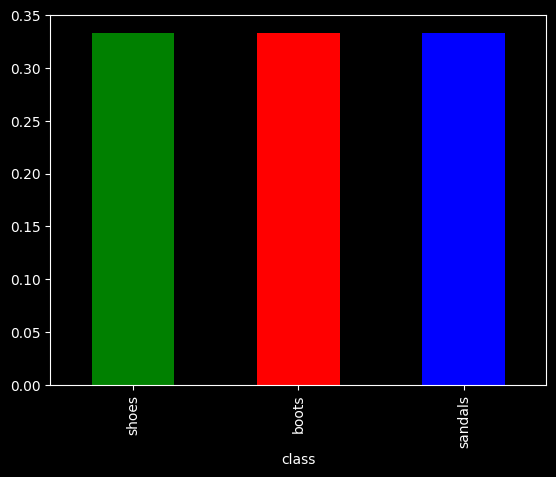

In [60]:
y_test.value_counts().plot.bar(color = ['green', 'red', 'blue'])
plt.show()
y_train.value_counts(normalize='true').plot.bar(color = ['green', 'red', 'blue'])
plt.show()

## 4. Unsupervised models <a class="anchor" id="models"></a>

##### utility methods

In [13]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import seaborn as sns
results = []

def eval_metrics(ytrue, ypred, model = 'model'):
    results_pos = {}
    results_pos['model'] = model
    #Accuracy
    results_pos['accuracy'] = accuracy_score(ytrue, ypred)
    #presion, recall, fscore
    precision, recall, fscore, _ =precision_recall_fscore_support(ytrue, ypred, pos_label=1, average='macro')
    results_pos['precision'] = precision
    results_pos['recall'] = recall
    results_pos['fscore'] = fscore
    return results_pos

def visualize_results(results):
    fig, ax1 = plt.subplots( figsize=(15, 5), ncols=1, sharey=False)
    res = pd.DataFrame(results)
    dff = res.set_index('model').stack().to_frame().reset_index().rename(columns={ 'level_1':'metrics', 0:'values' } )
    sns.barplot(data = dff, x ='model', y = 'values', hue='metrics', ax = ax1)
    plt.show()

### PCA

Since the background of the images is white, the variation is concentrated in the center of the images so we can use PCA to reduce the dimension and concentrate in the central parts of the images.

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [16]:
pca.components_.shape, pca.n_components_

((7200, 7200), 7200)

In [17]:
## number of components that concentrate 0.95% of the variace
pca.explained_variance_[np.cumsum(pca.explained_variance_ratio_) <0.95 ].shape

(469,)

In [18]:
pca = PCA(n_components=500)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [19]:
pca.components_.shape, X_train_pca.shape, X_train.shape, pca.n_components_

((500, 7200), (7200, 500), (7200, 7200), 500)

### KMeans clustering

In [20]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(X_train_pca)
labels_km = km.predict(X_train_pca)
labels_km

array([2, 0, 2, ..., 1, 2, 2], shape=(7200,), dtype=int32)

In [21]:
labels_km, y_train

(array([2, 0, 2, ..., 1, 2, 2], shape=(7200,), dtype=int32),
 7915      shoes
 7116      boots
 7423      shoes
 7194    sandals
 4292      boots
          ...   
 7520      boots
 8092    sandals
 7079    sandals
 2687      shoes
 3907    sandals
 Name: class, Length: 7200, dtype: object)

showing random figures on each cluster

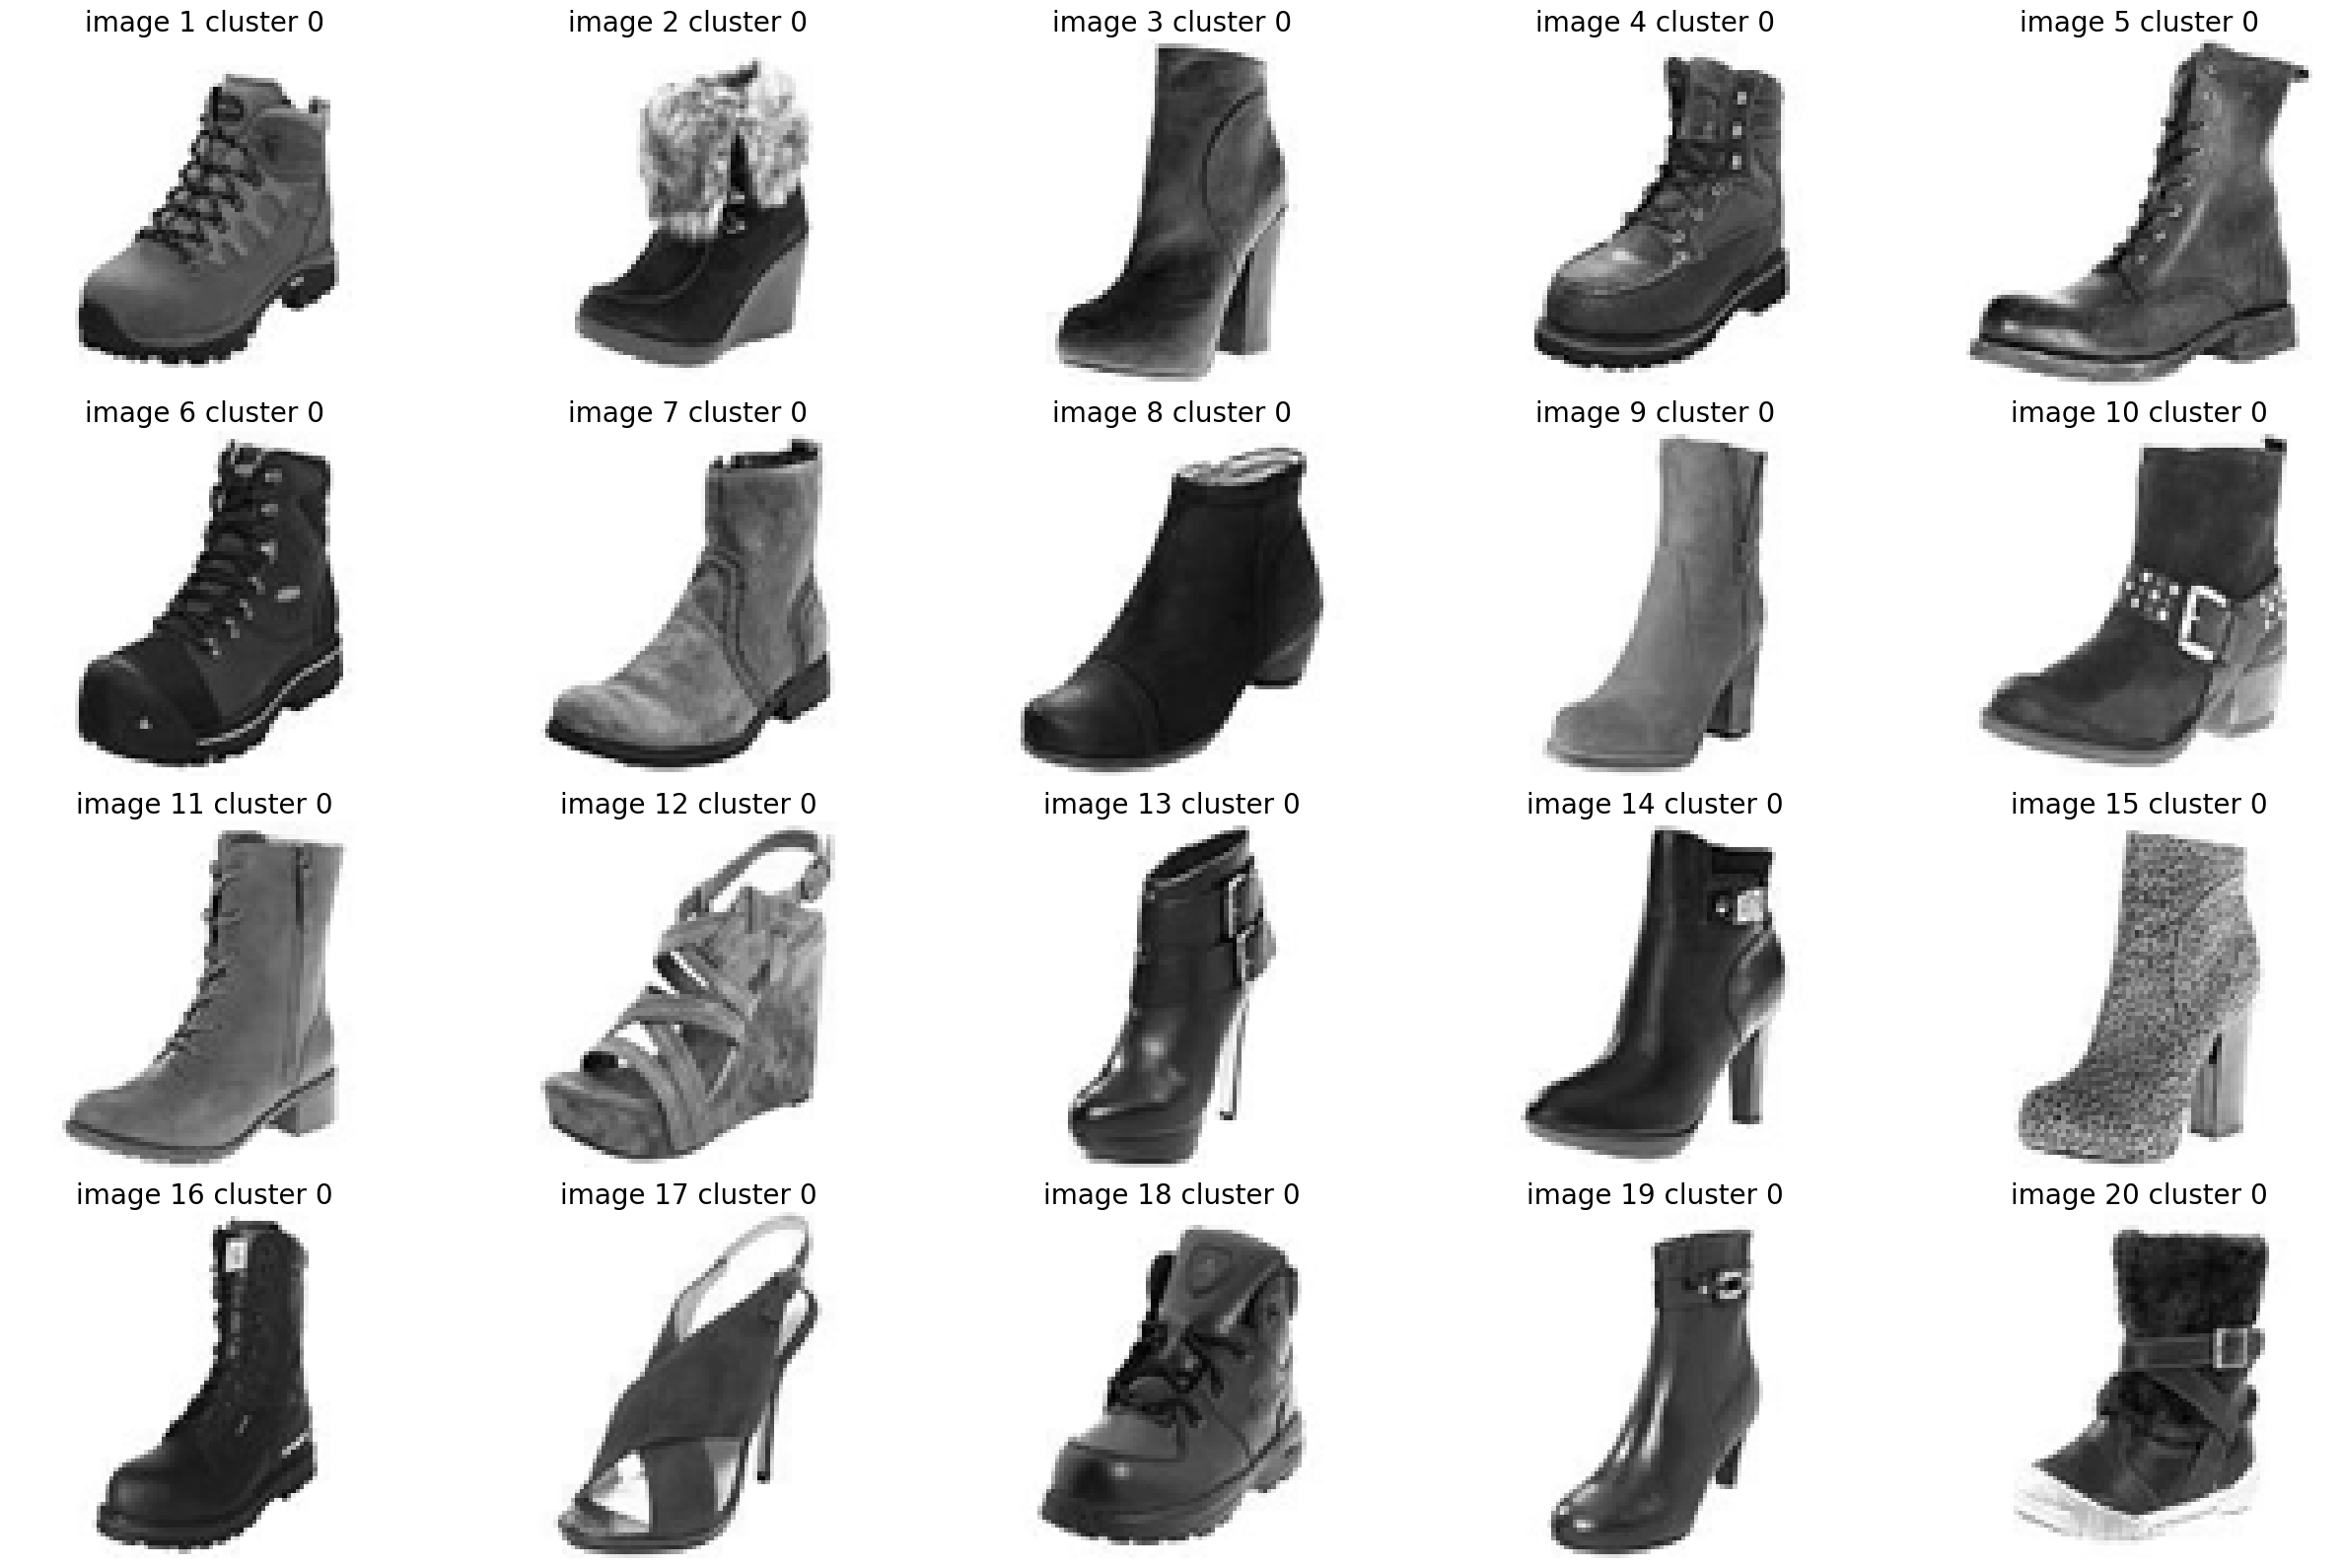

In [22]:
##cluster zero
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_km==0][random.randint(0, 1000)].reshape((80, 90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 0".format(str(i+1)), fontsize=20) 
plt.tight_layout()

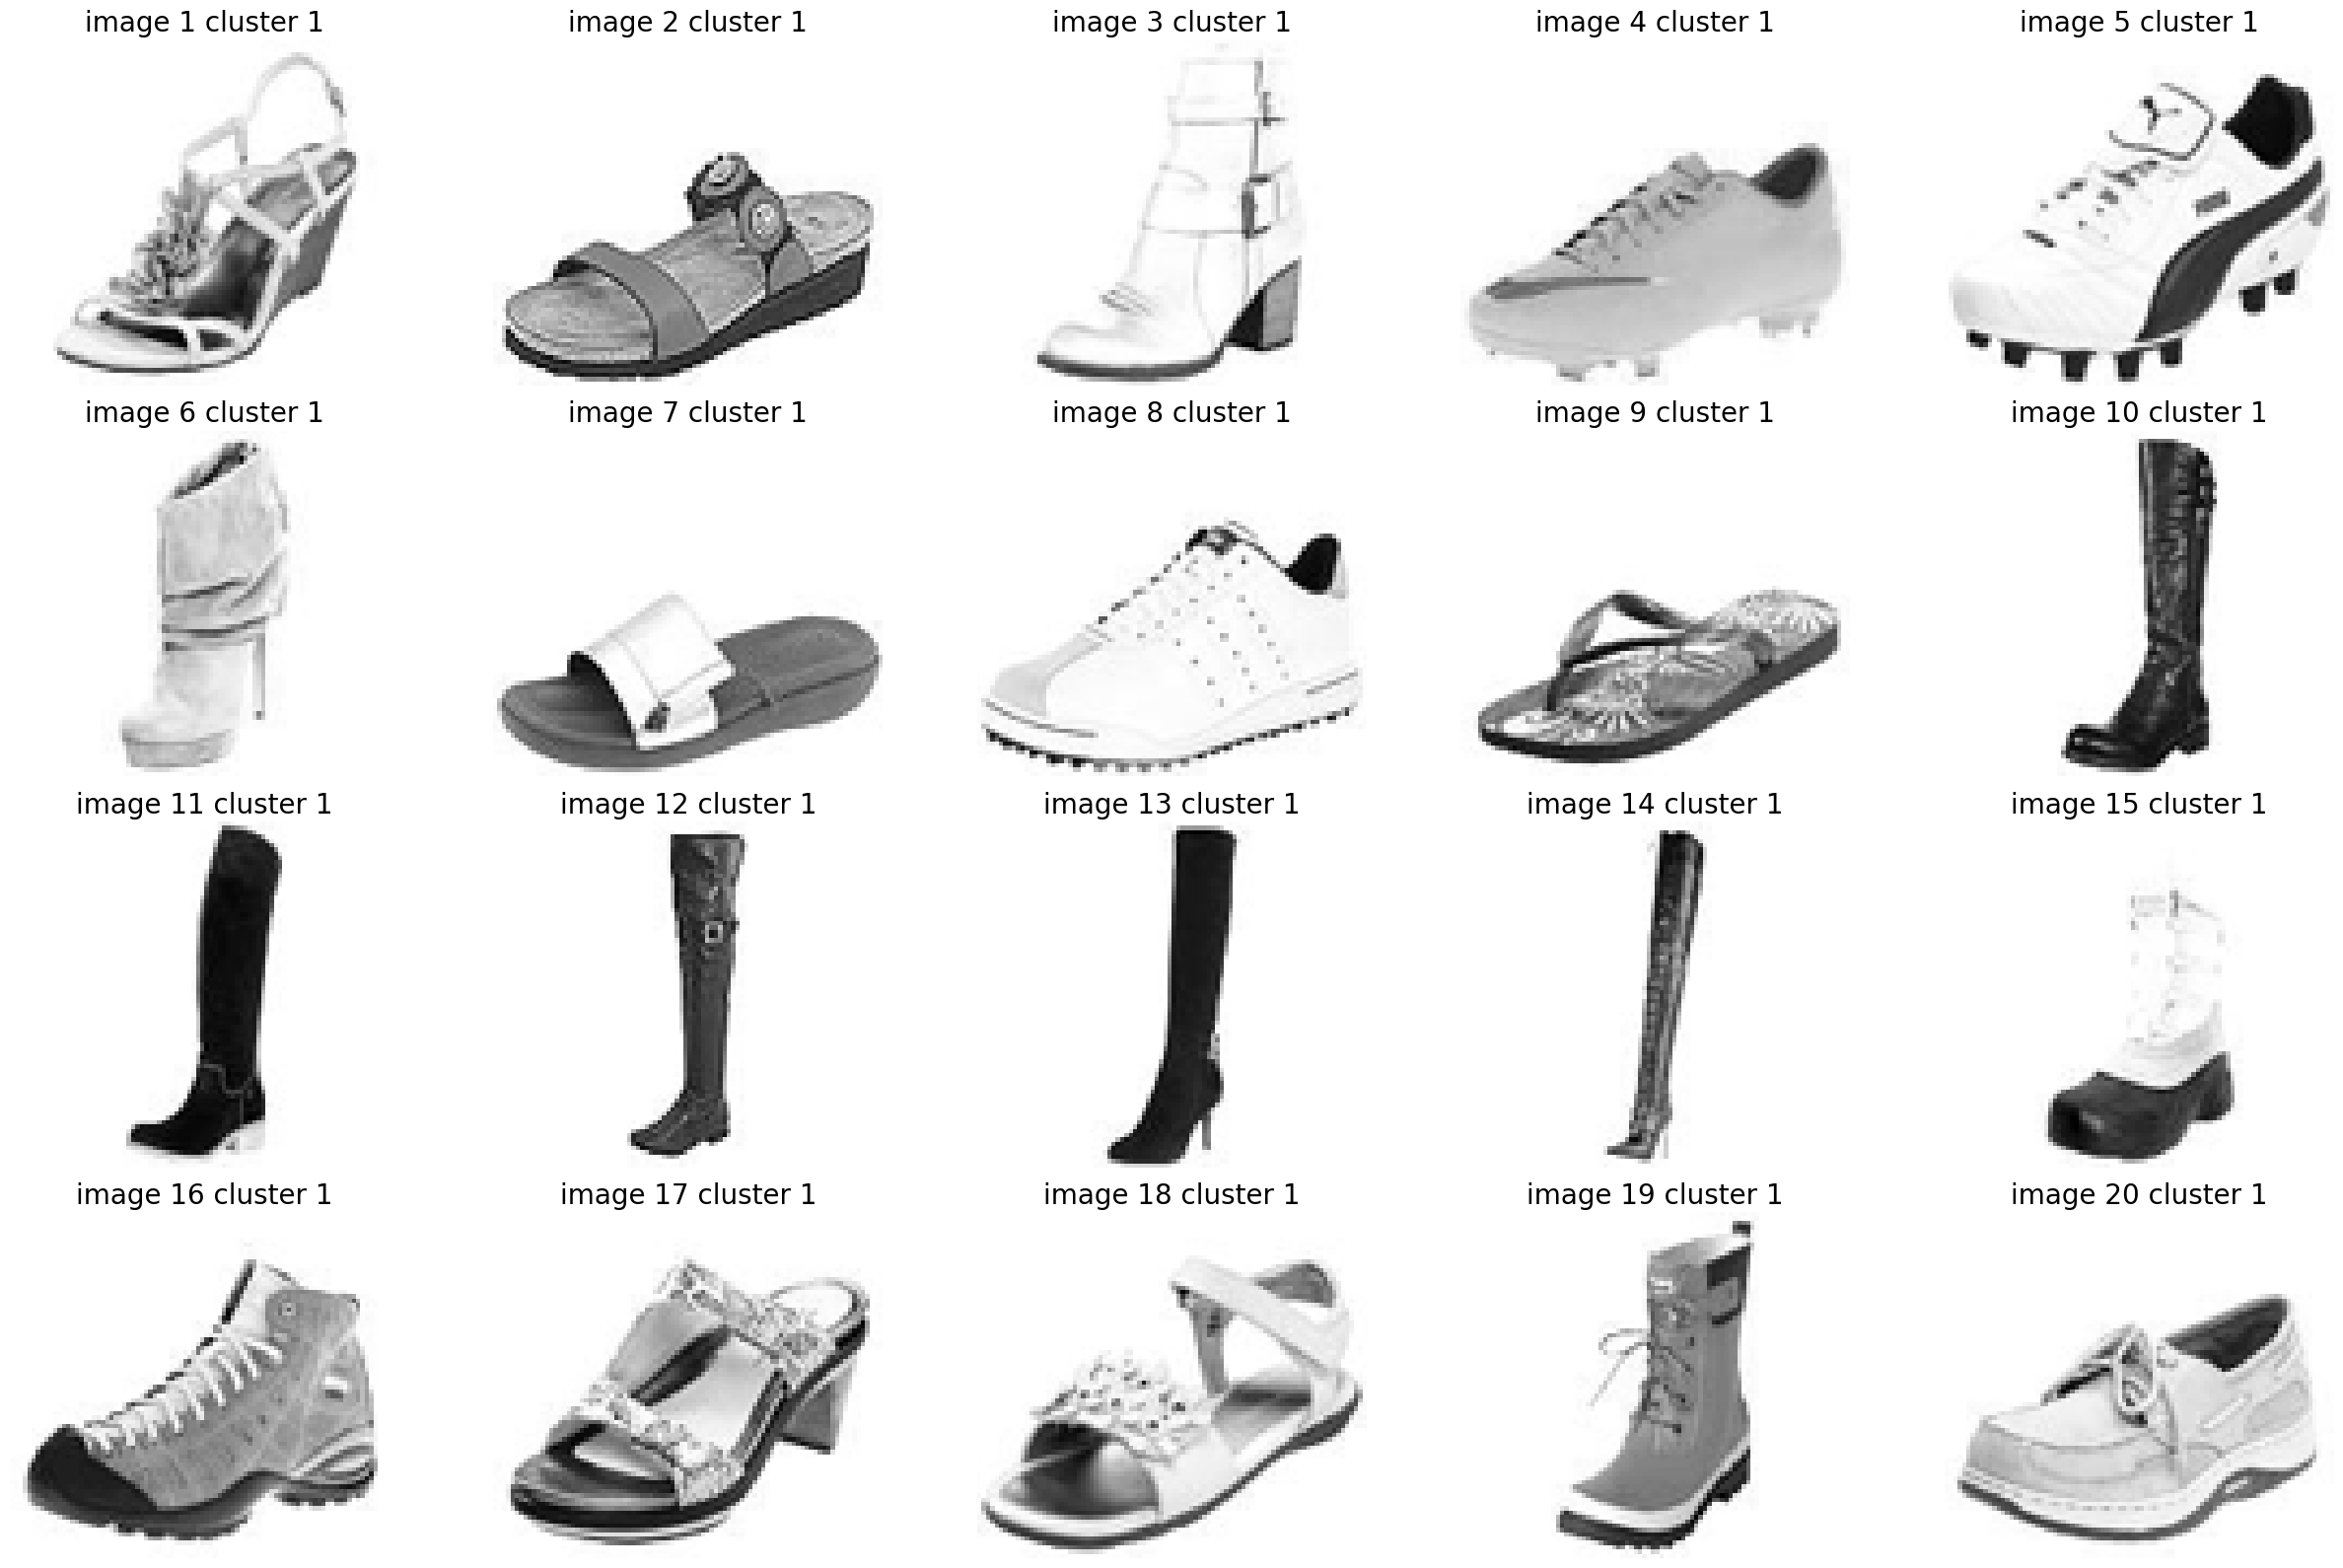

In [23]:
##cluster 1
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_km==1][random.randint(0, 1000)].reshape((80, 90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 1".format(str(i+1)), fontsize=20) 
plt.tight_layout()

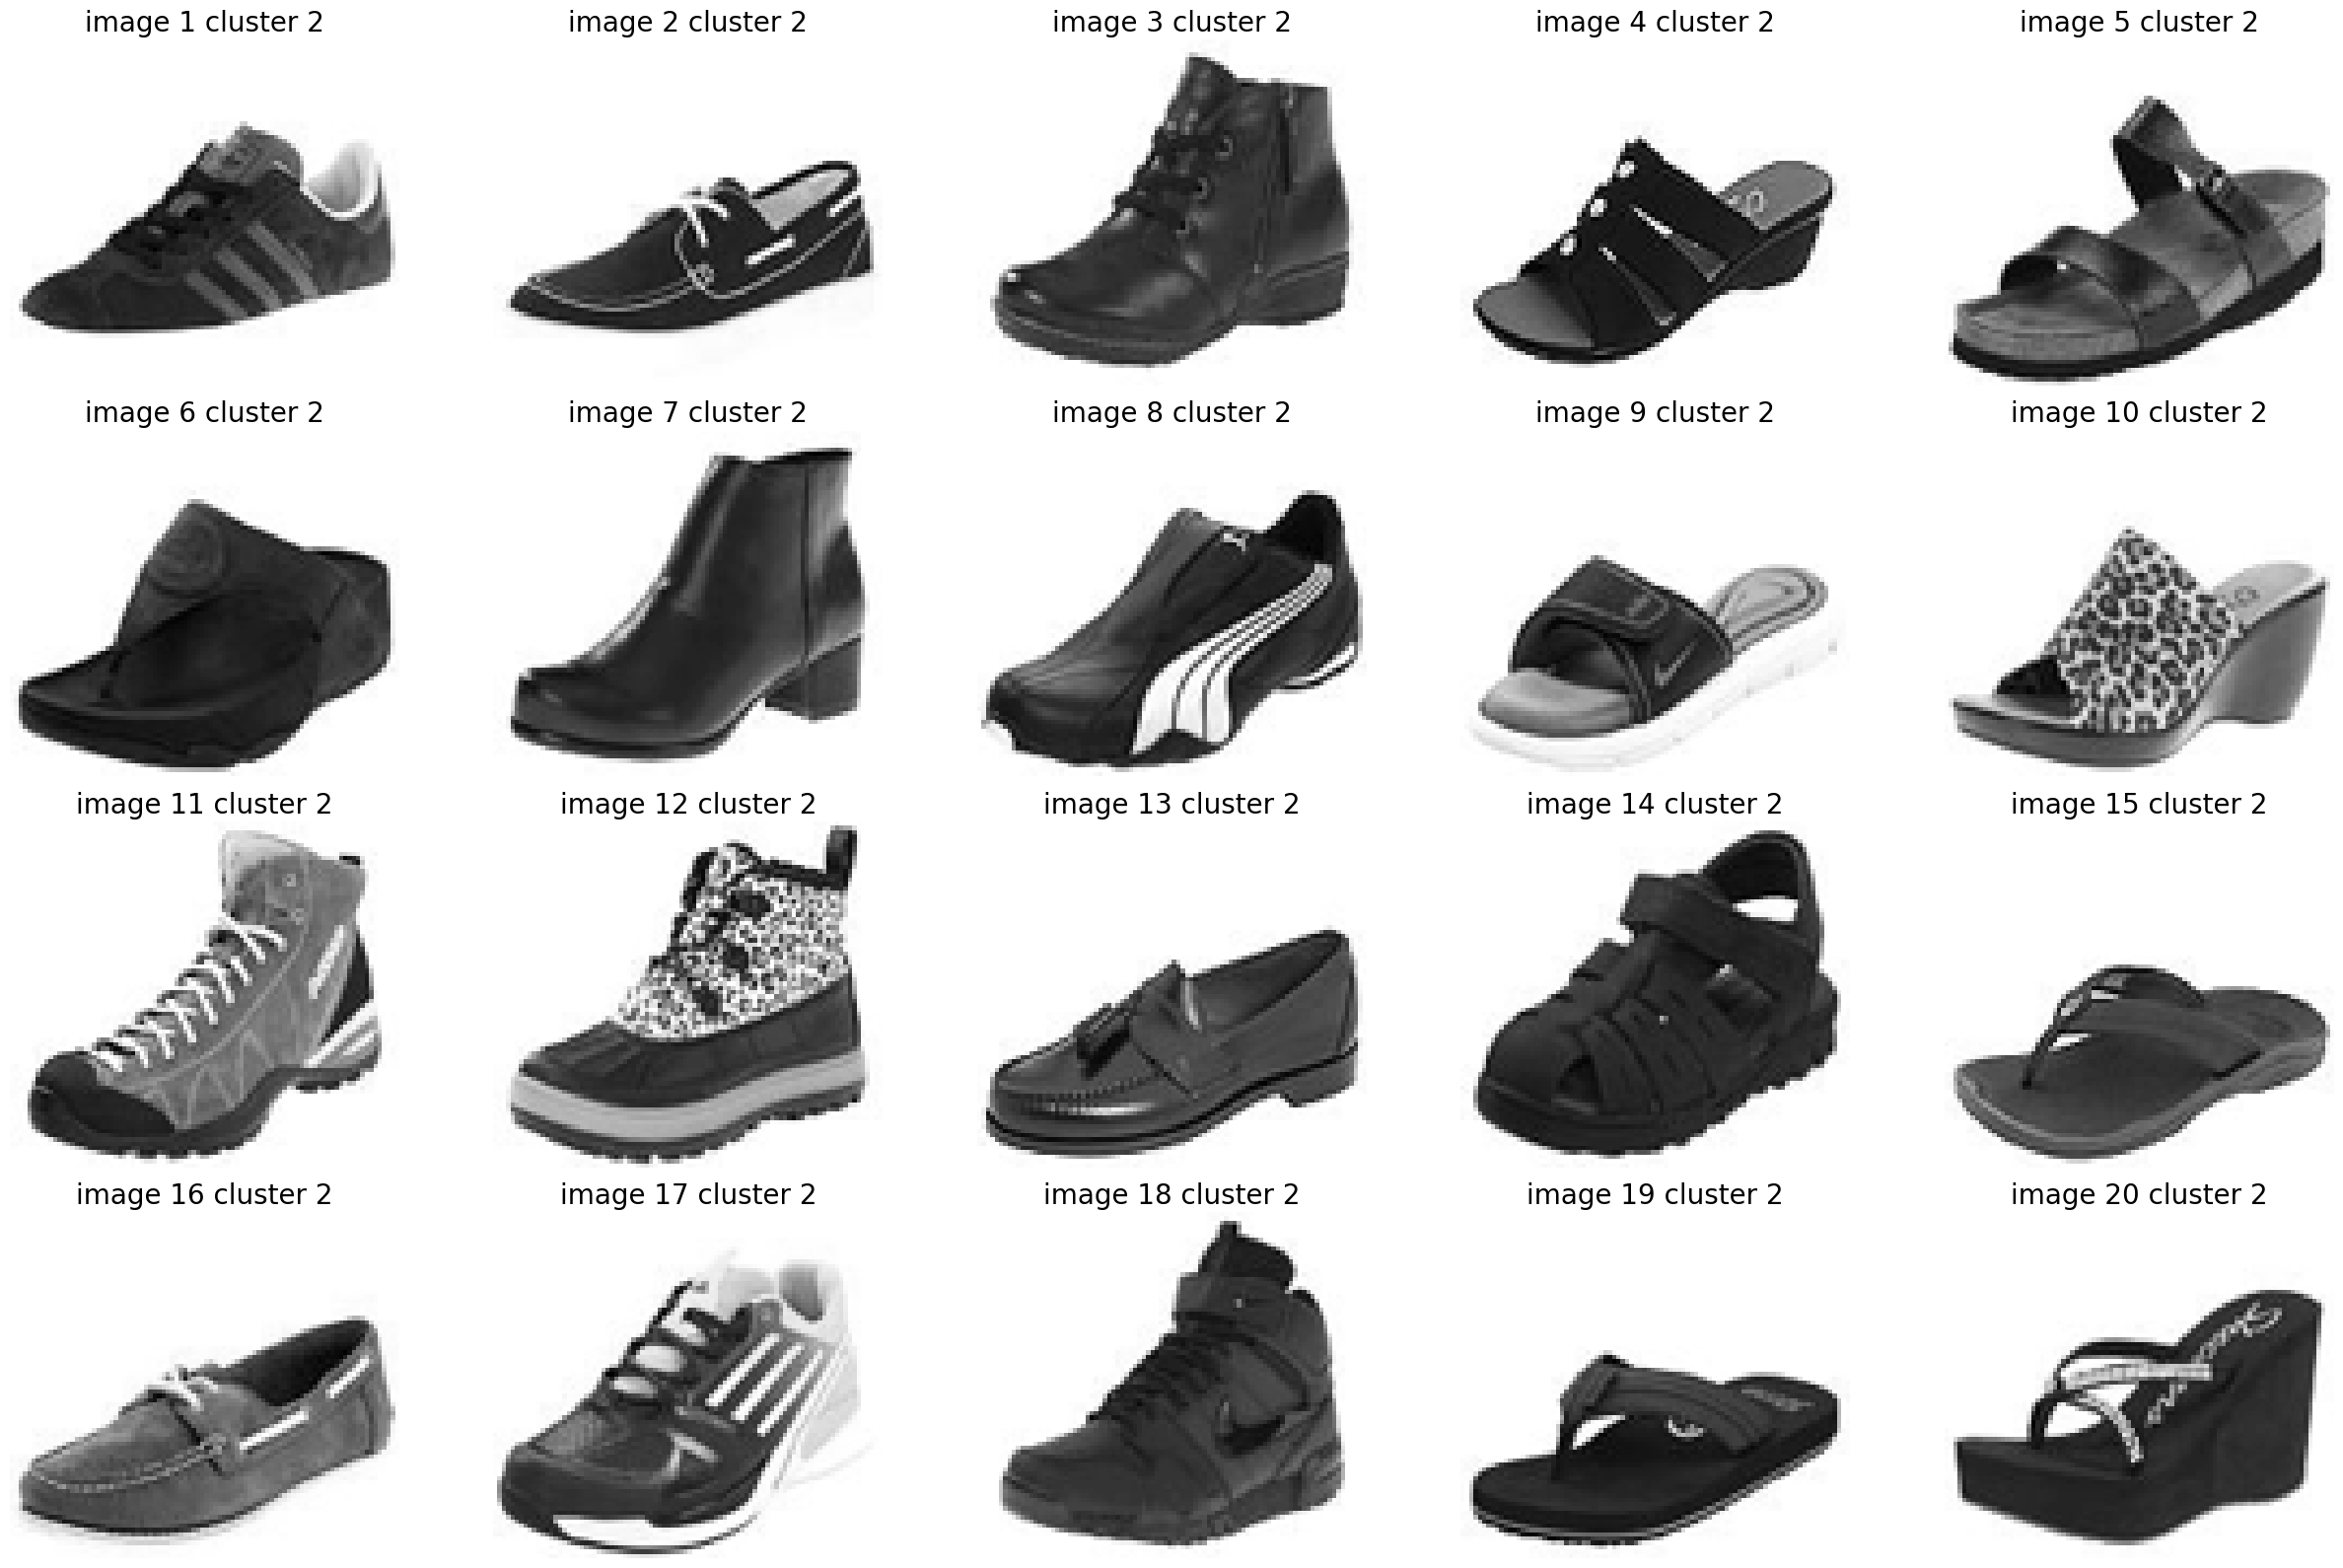

In [24]:
###cluster 2
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_km==2][random.randint(0, 1000)].reshape((80,90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 2".format(str(i+1)), fontsize=20) 
plt.tight_layout()

In [25]:
#### From the samples below we infer that 0->boots, 1->sandals, 2->shoes

In [26]:
## clustering the images in the test set
X_test_pca = pca.transform(X_test)
y_hat_km = km.predict(X_test_pca)
y_test.shape, y_hat_km.shape
for i in range(10):
    print(y_hat_km[i],y_test.reset_index(drop=True)[i])


2 sandals
0 boots
0 shoes
2 shoes
1 sandals
0 sandals
1 shoes
2 sandals
1 sandals
0 boots


In [27]:
#### labeling the test sets according to the clusters
y_test_labels_km = y_test.replace({'boots':'0', 'sandals': '1', 'shoes': '2'})
y_test_labels_km = y_test_labels_km.astype(int)
y_test_labels_km

3538    1
3572    0
4232    2
8169    2
2513    1
       ..
595     2
4368    1
5129    2
8547    1
4288    1
Name: class, Length: 1800, dtype: int64

In [28]:
from sklearn.metrics import classification_report
report_km = classification_report(np.array(y_test_labels_km), y_hat_km)
print(report_km)

              precision    recall  f1-score   support

           0       0.85      0.61      0.71       600
           1       0.47      0.51      0.49       600
           2       0.55      0.66      0.60       600

    accuracy                           0.59      1800
   macro avg       0.63      0.59      0.60      1800
weighted avg       0.63      0.59      0.60      1800



In [29]:
print( eval_metrics(y_test_labels_km, y_hat_km, model= 'k means') )
results.append( eval_metrics(y_test_labels_km, y_hat_km, model ='k means') )

{'model': 'k means', 'accuracy': 0.595, 'precision': 0.6253403841998914, 'recall': 0.5949999999999999, 'fscore': 0.6018746735870862}


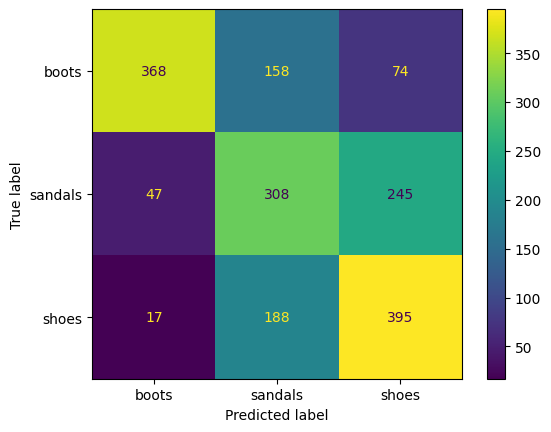

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


cm_km = ConfusionMatrixDisplay( confusion_matrix(np.array(y_test_labels_km), y_hat_km), display_labels=['boots', 'sandals', 'shoes'])
cm_km.plot()

### Gaussian Mixture  

In [31]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=1, covariance_type='tied')
gmm.fit(X_train_pca)
labels_gmm = gmm.predict(X_train_pca) # num of pixels x 1
labels_gmm

array([2, 0, 2, ..., 0, 2, 2], shape=(7200,))

In [32]:
labels_gmm, y_train

(array([2, 0, 2, ..., 0, 2, 2], shape=(7200,)),
 7915      shoes
 7116      boots
 7423      shoes
 7194    sandals
 4292      boots
          ...   
 7520      boots
 8092    sandals
 7079    sandals
 2687      shoes
 3907    sandals
 Name: class, Length: 7200, dtype: object)

showing random figures on each cluster

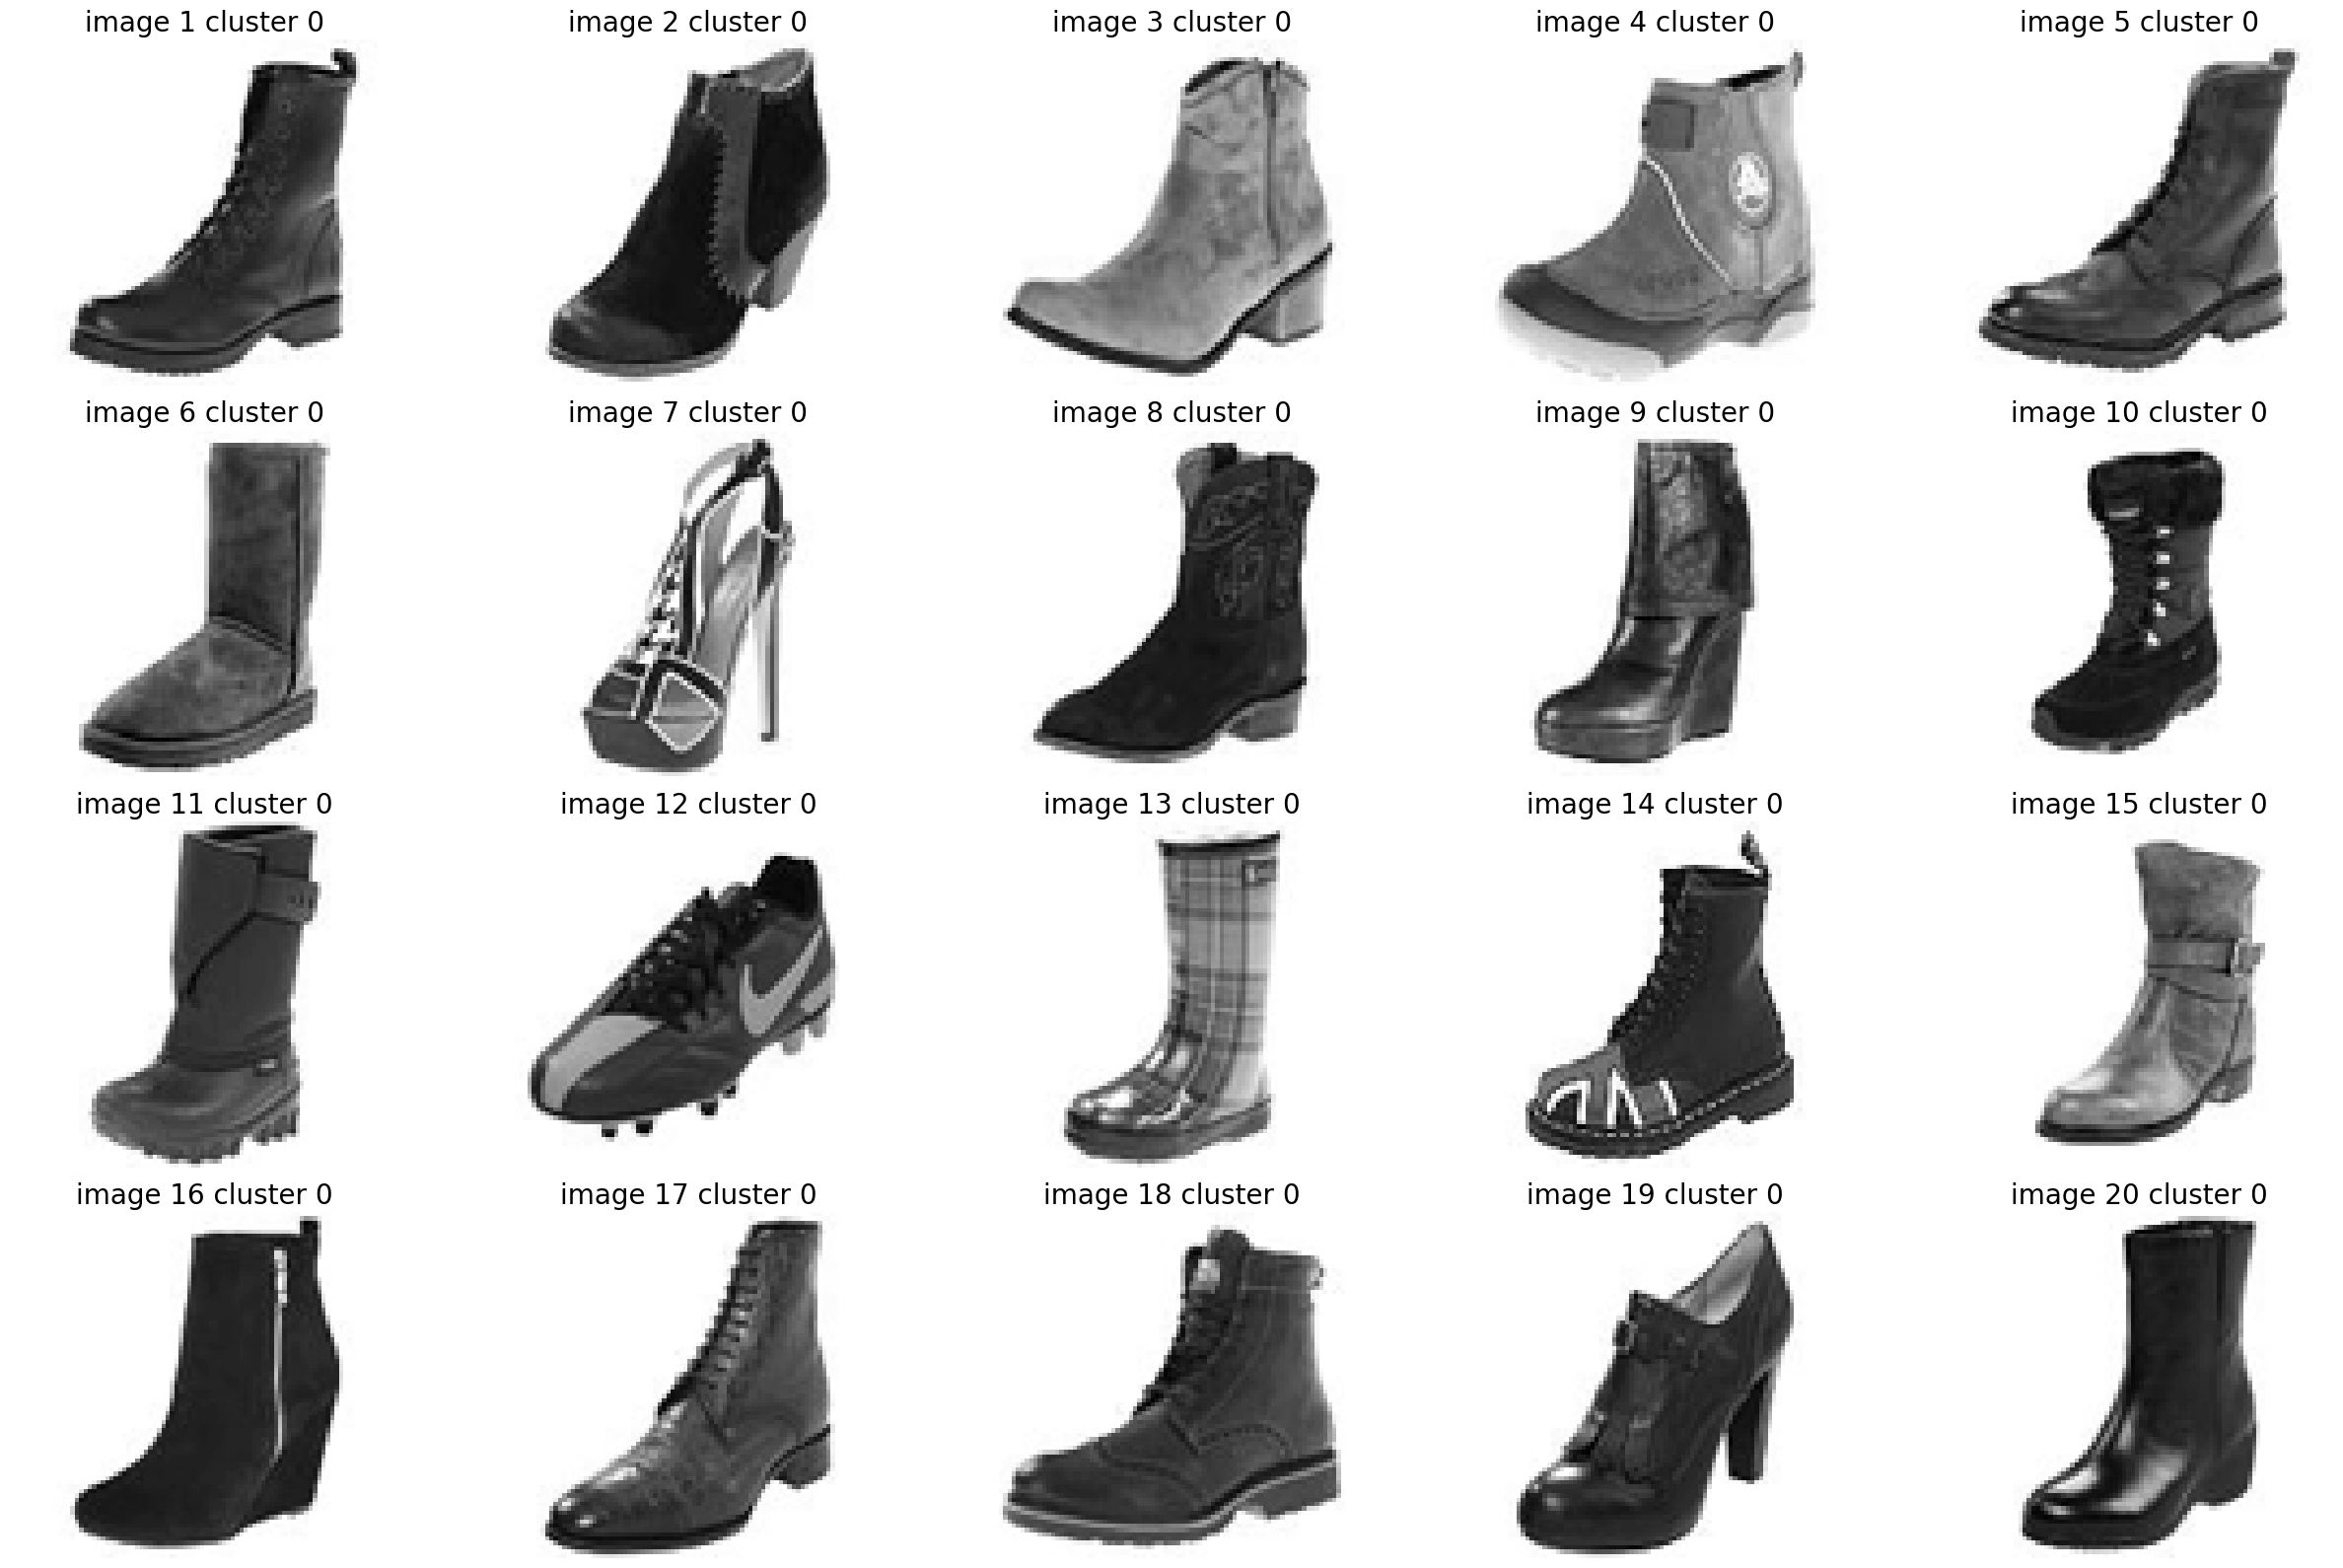

In [33]:
##cluster zero
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_gmm==0][random.randint(0, 1000)].reshape((80, 90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 0".format(str(i+1)), fontsize=20) 
plt.tight_layout()

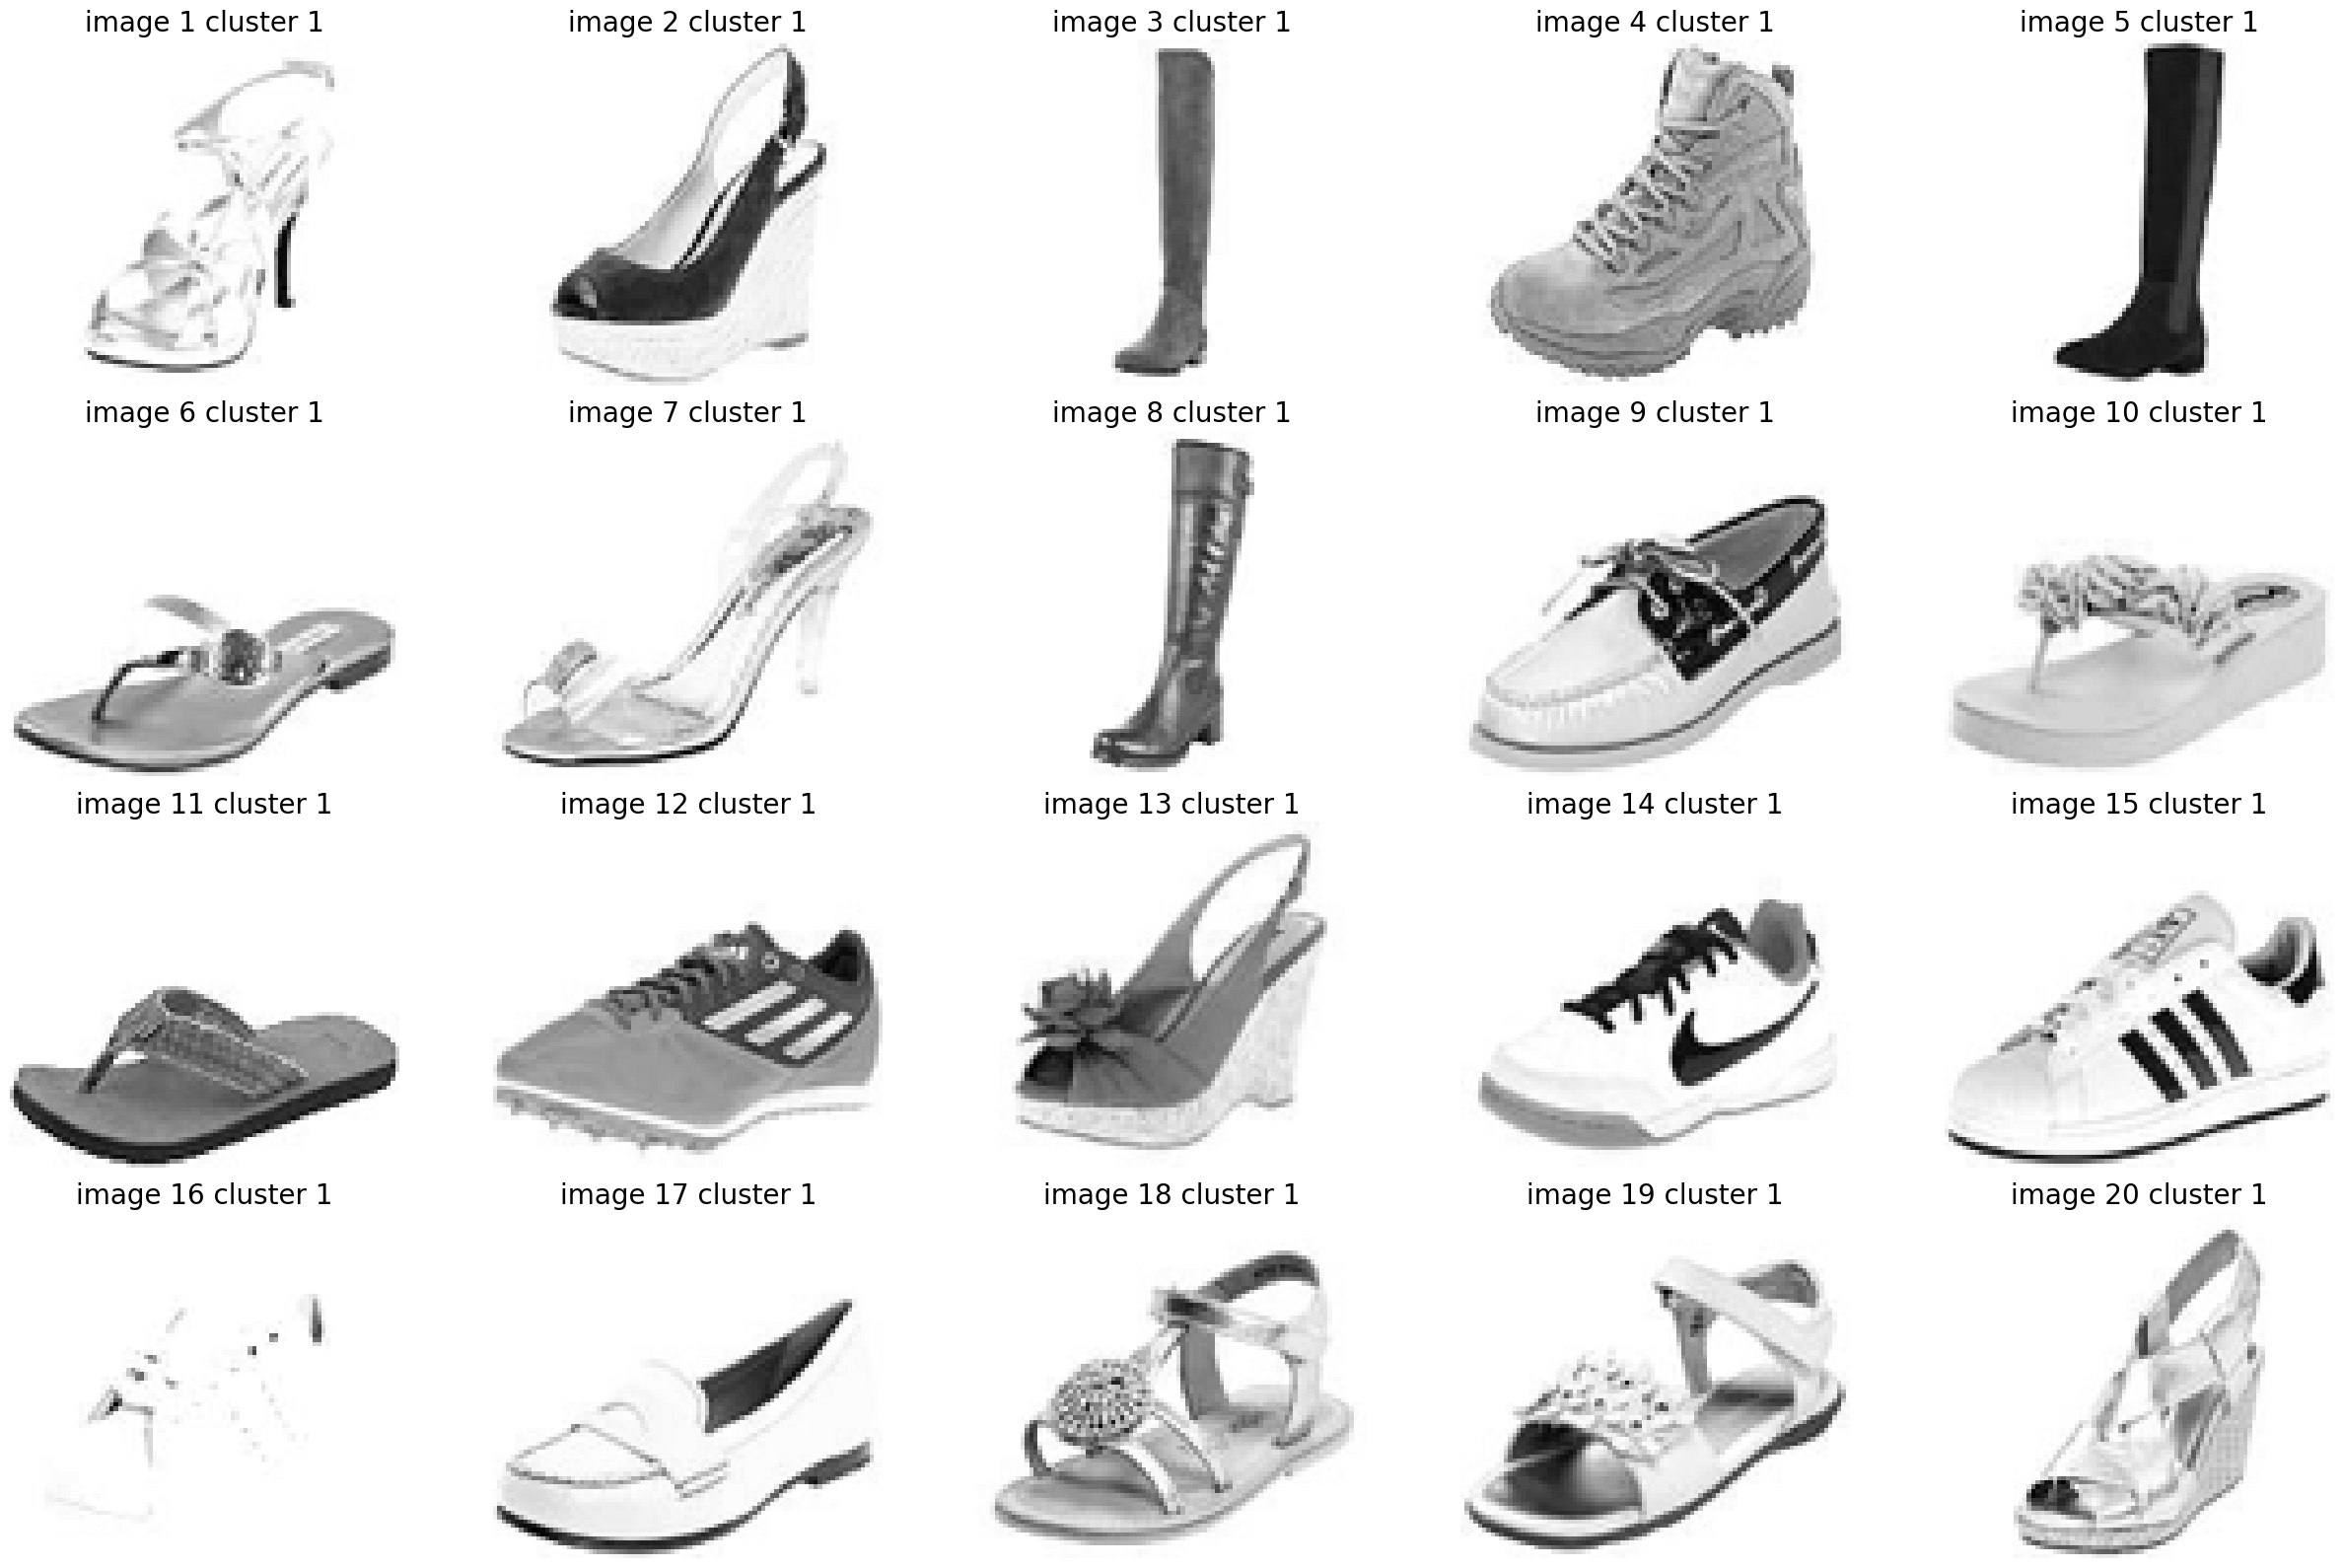

In [34]:
##cluster one
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_gmm==1][random.randint(0, 1000)].reshape((80, 90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 1".format(str(i+1)), fontsize=20) 
plt.tight_layout()

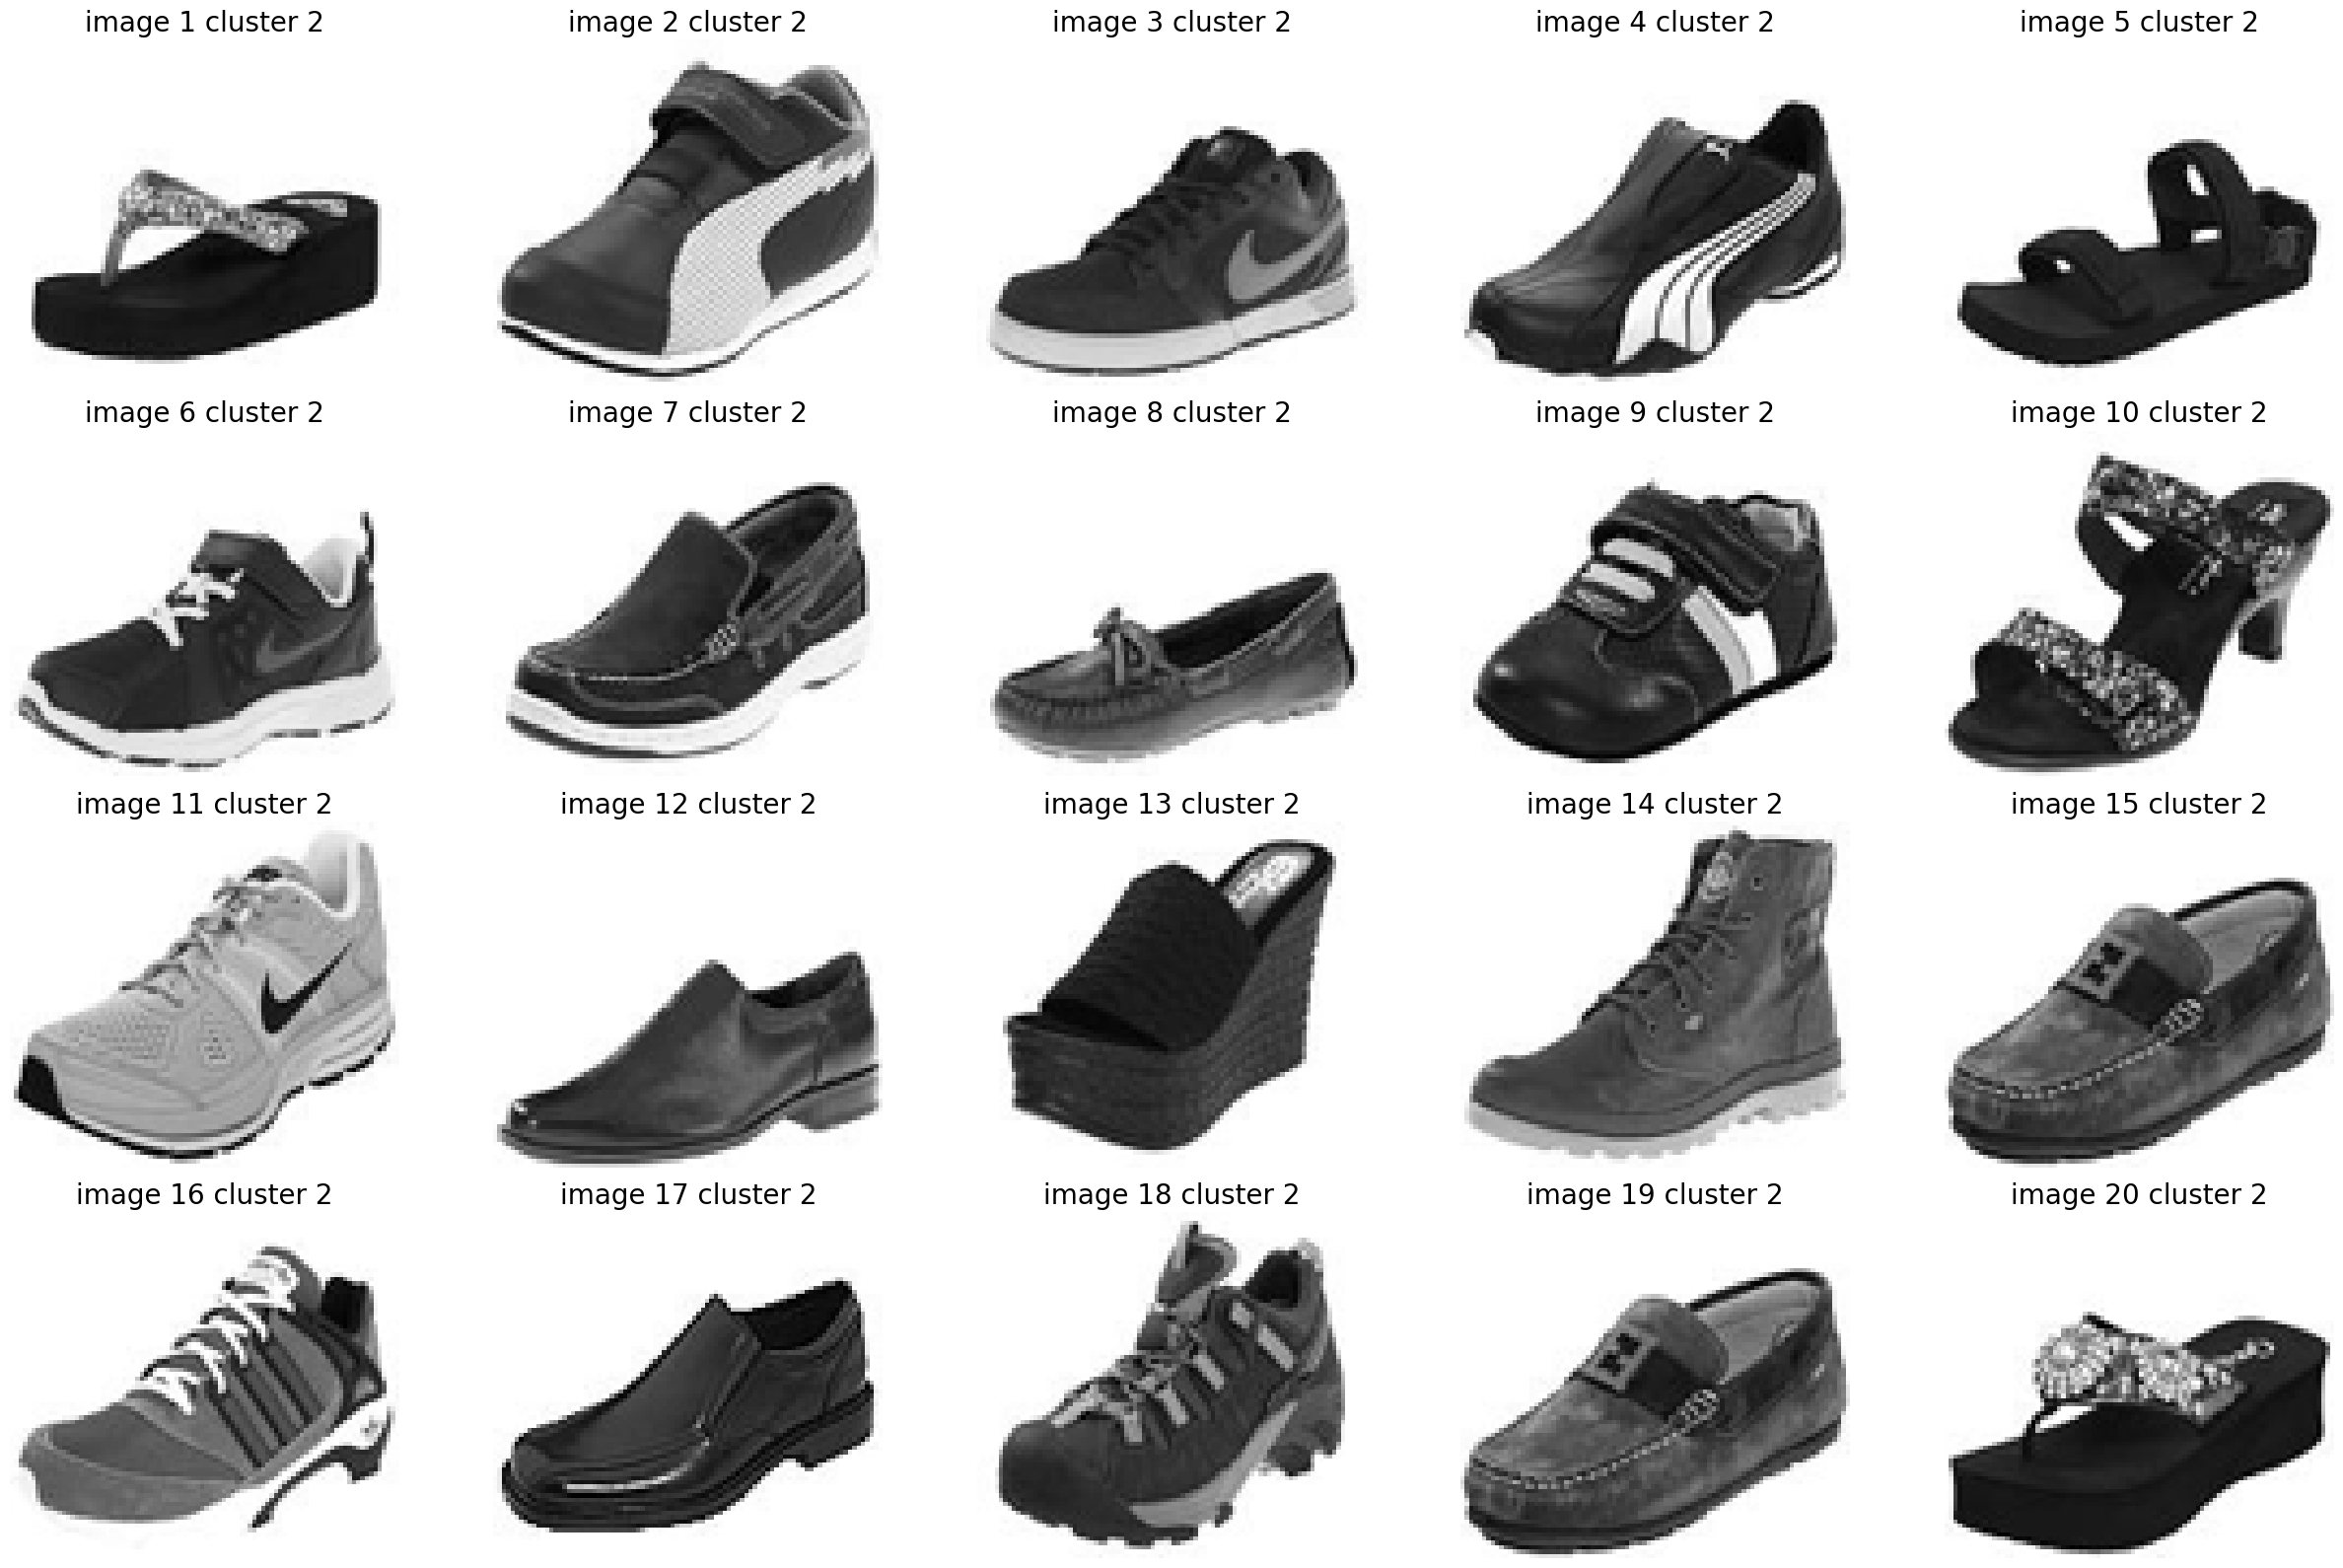

In [35]:
##cluster two
plt.figure(figsize=(25, 16))

for i in range(20):   
    plt.subplot(4, 5, i+1)
    plt.imshow(np.array(X_train)[labels_gmm==2][random.randint(0, 1000)].reshape((80, 90)), cmap='gray')
    plt.axis('off')
    plt.title("image {} cluster 2".format(str(i+1)), fontsize=20) 
plt.tight_layout()

In [36]:
### 0-> boots, 1-> sandals, 2 -> shoes

In [37]:
##labeling the test set according to the clusters 
y_test_labels_gmm = y_test.replace({'boots':'0', 'sandals': '1', 'shoes': '2'})
y_test_labels_gmm= y_test_labels_gmm.astype(int)
y_test_labels_gmm

3538    1
3572    0
4232    2
8169    2
2513    1
       ..
595     2
4368    1
5129    2
8547    1
4288    1
Name: class, Length: 1800, dtype: int64

In [38]:
y_hat_gmm = gmm.predict(X_test_pca)
print(y_test.shape), print(y_hat_gmm.shape)
for i in range(10):
    print(y_hat_gmm[i],y_test.reset_index(drop=True)[i])

(1800,)
(1800,)
2 sandals
0 boots
0 shoes
2 shoes
1 sandals
0 sandals
1 shoes
2 sandals
1 sandals
0 boots


In [39]:
np.unique(y_hat_gmm)


array([0, 1, 2])

In [40]:
report_gmm = classification_report(np.array(y_test_labels_gmm), y_hat_gmm)
print(report_gmm)

              precision    recall  f1-score   support

           0       0.83      0.64      0.73       600
           1       0.48      0.48      0.48       600
           2       0.56      0.69      0.62       600

    accuracy                           0.60      1800
   macro avg       0.63      0.60      0.61      1800
weighted avg       0.63      0.60      0.61      1800



In [41]:
print(eval_metrics(y_test_labels_gmm, y_hat_gmm, model = 'Gaussian mixture'))
results.append( eval_metrics(y_test_labels_gmm, y_hat_gmm, model = 'Gaussian mixture') )

{'model': 'Gaussian mixture', 'accuracy': 0.6044444444444445, 'precision': 0.6254882052323417, 'recall': 0.6044444444444445, 'fscore': 0.608688689696511}


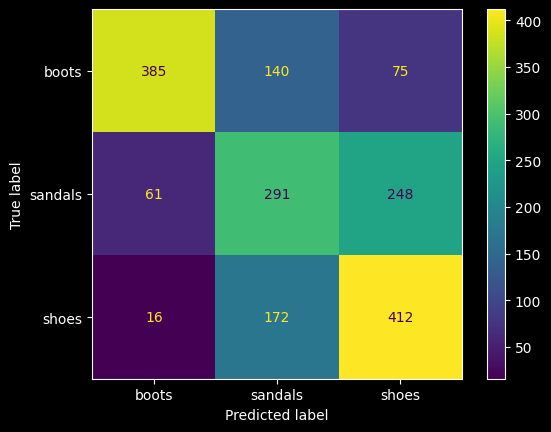

In [62]:
cm_gmm = ConfusionMatrixDisplay( confusion_matrix(np.array(y_test_labels_gmm), y_hat_gmm), display_labels=['boots', 'sandals', 'shoes'])
cm_gmm.plot()

### Non Negative Matrix Factorization

In [43]:
X_train.shape, X_test.shape

((7200, 7200), (1800, 7200))

In [44]:
from sklearn.decomposition import NMF

In [45]:
#nmf = NMF(n_components=3, tol=5e-3, max_iter=2000, init='random', random_state=1)
nmf = NMF(n_components= 3, init= 'random', random_state=1, max_iter= 2000)
nmf.fit(X_train)
W_train = nmf.transform(X_train)
W_test = nmf.transform(X_test)

In [46]:
W_train.shape, W_test.shape 

((7200, 3), (1800, 3))

In [47]:
nmf.components_.shape

(3, 7200)

In [48]:
nmf_clusters_test = pd.DataFrame( W_test.round(3), index=y_test, columns=['cluster 0', 'cluster 1', 'cluster 2'] )
nmf_clusters_test.head(10)

,cluster 0,cluster 1,cluster 2
class,,,
sandals,6.875,2.390,11.406
boots,19.142,1.694,1.517
shoes,17.572,0.766,3.627
shoes,6.667,1.644,13.297
sandals,4.151,14.567,13.557
sandals,18.796,8.028,1.507
shoes,5.132,17.339,12.503
sandals,0.666,3.887,16.664
sandals,3.217,14.611,13.734


In [49]:
y_hat_nmf = np.argmax(nmf_clusters_test, axis=1)
y_hat_nmf

array([2, 0, 0, ..., 2, 2, 1], shape=(1800,))

In [50]:
#### assing class for each transformed X_test
nmf_clusters_test.reset_index().groupby('class').mean()

,cluster 0,cluster 1,cluster 2
class,,,
boots,14.834367,8.066350,4.637127
sandals,5.648745,8.731797,12.716698
shoes,6.634885,6.233023,12.116798


In [51]:
## boots -> 3, sandals--> 1, shoes-->2

##labeling the test set according to the clusters 
y_test_labels_nmf = y_test.replace({'boots':'0', 'sandals': '1', 'shoes': '2'})
y_test_labels_nmf = y_test_labels_nmf.astype(int)
y_test_labels_nmf

3538    1
3572    0
4232    2
8169    2
2513    1
       ..
595     2
4368    1
5129    2
8547    1
4288    1
Name: class, Length: 1800, dtype: int64

In [52]:
report_nmf = classification_report(np.array(y_test_labels_nmf), y_hat_nmf)
print(report_nmf)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       600
           1       0.37      0.20      0.26       600
           2       0.47      0.60      0.53       600

    accuracy                           0.53      1800
   macro avg       0.50      0.53      0.50      1800
weighted avg       0.50      0.53      0.50      1800



In [53]:
print( eval_metrics(y_test_labels_nmf, y_hat_nmf, model = 'non-negative matrix') )
results.append( eval_metrics(y_test_labels_nmf, y_hat_nmf, model = 'non-negative matrix') )

{'model': 'non-negative matrix', 'accuracy': 0.5311111111111111, 'precision': 0.5038706775881249, 'recall': 0.5311111111111111, 'fscore': 0.5045283438644876}


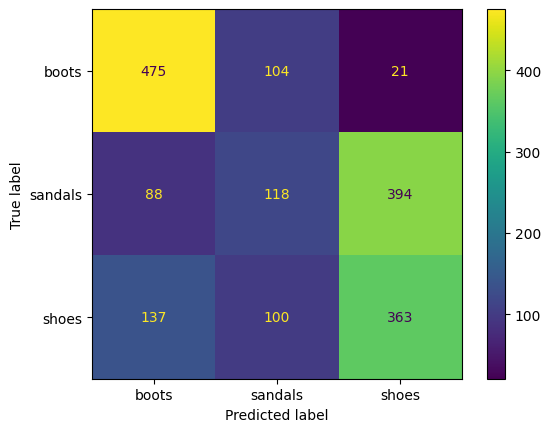

In [54]:
cm_nmf = ConfusionMatrixDisplay( confusion_matrix(np.array(y_test_labels_nmf), y_hat_nmf), display_labels=['boots', 'sandals', 'shoes'])
cm_nmf.plot()

## 5. Summary of the results <a class="anchor" id="summary"></a>

In [55]:
results

[{'model': 'k means',
  'accuracy': 0.595,
  'precision': 0.6253403841998914,
  'recall': 0.5949999999999999,
  'fscore': 0.6018746735870862},
 {'model': 'Gaussian mixture',
  'accuracy': 0.6044444444444445,
  'precision': 0.6254882052323417,
  'recall': 0.6044444444444445,
  'fscore': 0.608688689696511},
 {'model': 'non-negative matrix',
  'accuracy': 0.5311111111111111,
  'precision': 0.5038706775881249,
  'recall': 0.5311111111111111,
  'fscore': 0.5045283438644876}]

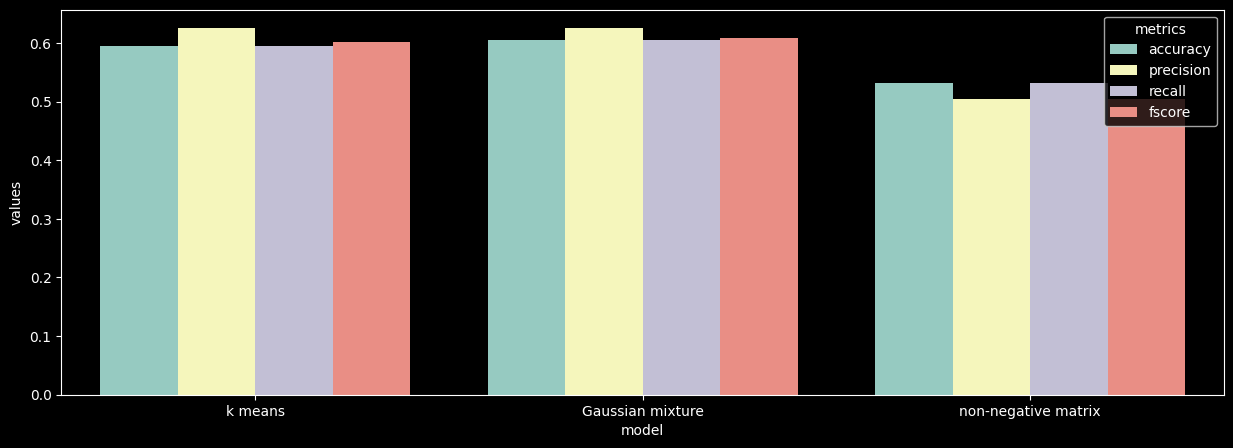

In [61]:
visualize_results(results)

##### Best model: Gaussian mixture model

In [57]:
eval_metrics(y_test_labels_gmm, y_hat_gmm, model='Gaussian Mixture')

{'model': 'Gaussian Mixture',
 'accuracy': 0.6044444444444445,
 'precision': 0.6254882052323417,
 'recall': 0.6044444444444445,
 'fscore': 0.608688689696511}

## 6. Conclusion <a class="anchor" id="conclusion"></a>

We consider a dataset that includes images of boots, sandals, and boots. We train and test different clustering models, after doing some dimensionality reduction using PCA, with the aim to classify the images into their respective categories. Among the clustering models considered ( K means, Gaussian mixture, and Non negative Matrix factorization), Gaussian Mixture has the better performance, giving an average accuracy of 0.612 and fscore of 0.616. All models considered seem to have problems to distinguish between  shoes and sandals.

To be able to train the models seamlessly in a laptop with 16gb of ram memory, we have only used a sample of the dataset and we have reduced the number of pixels of the images used. With more computational resources a thorough exploration of different clustering models (like DBSCAN, Mean shift, etc) could be carried out. 